In [37]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [40]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# Set number of classes

In [43]:
NUM_CLASSES = 26

# Dataset reading

In [46]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [48]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [53]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [55]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26)             │           286 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,356 (5.30 KB)

 Trainable params: 1,356 (5.30 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [59]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [62]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0343 - loss: 3.2974 
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.0348 - loss: 3.2956 - val_accuracy: 0.0847 - val_loss: 3.2150
Epoch 2/1000
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0661 - loss: 3.2090 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0687 - loss: 3.2029 - val_accuracy: 0.1495 - val_loss: 3.1099
Epoch 3/1000
21/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0996 - loss: 3.1291 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1033 - loss: 3.1128 - val_accuracy: 0.1615 - val_loss: 2.9464
Epoch 4/1000
16/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1144 - loss: 2.9719 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.kera

In [66]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8873 - loss: 0.4148 


In [68]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [69]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[9.5102850e-09 1.7643089e-37 1.8206013e-03 0.0000000e+00 4.2808604e-36
 3.5553986e-26 2.8130993e-01 6.9846010e-01 2.1870540e-25 0.0000000e+00
 0.0000000e+00 7.7558221e-17 1.9396837e-12 3.2193639e-15 1.4587813e-04
 1.2563591e-02 1.4291587e-04 3.9743828e-15 4.2652179e-18 2.0765146e-25
 2.7970967e-37 2.7787499e-38 2.8977610e-26 5.5568987e-03 2.4380225e-31
 1.7354481e-19]
7


# Confusion matrix

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


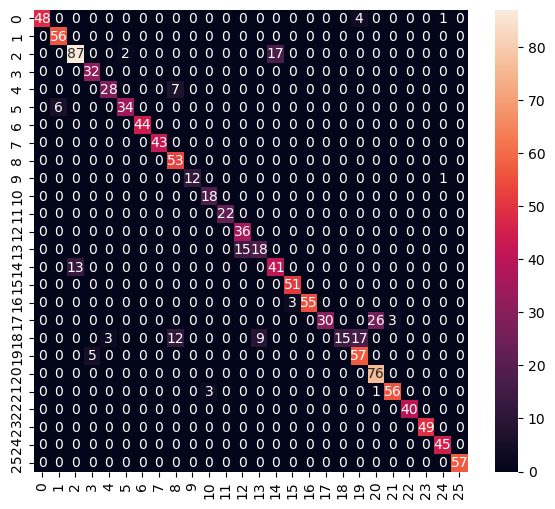

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        53
           1       0.90      1.00      0.95        56
           2       0.87      0.82      0.84       106
           3       0.86      1.00      0.93        32
           4       0.90      0.80      0.85        35
           5       0.94      0.85      0.89        40
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        43
           8       0.74      1.00      0.85        53
           9       1.00      0.92      0.96        13
          10       0.86      1.00      0.92        18
          11       1.00      1.00      1.00        22
          12       0.71      1.00      0.83        36
          13       0.67      0.55      0.60        33
          14       0.71      0.76      0.73        54
          15       0.94      1.00      0.97        51
          16       1.00      0.95      0.97        58
     

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [91]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [93]:
# Transform model (quantization)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\sabbi\AppData\Local\Temp\tmptcdlzpc4\assets


INFO:tensorflow:Assets written to: C:\Users\sabbi\AppData\Local\Temp\tmptcdlzpc4\assets


Saved artifact at 'C:\Users\sabbi\AppData\Local\Temp\tmptcdlzpc4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  2441886086352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2441886088656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2441886087504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2441886084048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2441886085584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2441886082320: TensorSpec(shape=(), dtype=tf.resource, name=None)


7524

# Inference test

In [96]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

C:\Users\sabbi\anaconda3\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [98]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [100]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [102]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [104]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.5102557e-09 1.7643234e-37 1.8206035e-03 0.0000000e+00 4.2808625e-36
 3.5554417e-26 2.8130949e-01 6.9846064e-01 2.1870555e-25 0.0000000e+00
 0.0000000e+00 7.7557678e-17 1.9396850e-12 3.2193785e-15 1.4587838e-04
 1.2563541e-02 1.4291570e-04 3.9744006e-15 4.2652208e-18 2.0765158e-25
 2.7970982e-37 3.2841461e-38 2.8977847e-26 5.5568814e-03 2.4380237e-31
 1.7354557e-19]
7
